In [1]:
###### Machine Learning Libraries ######

import numpy as np
import pandas as pd
import scipy as shc
import nltk
import spacy
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, silhouette_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, chi2, mutual_info_classif, mutual_info_regression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, VotingClassifier, VotingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from xgboost import XGBClassifier, XGBRegressor

###### Deep Learning Libraries ######

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU, Conv2D, MaxPool2D, AveragePooling2D, Flatten, LSTM, Bidirectional, Embedding
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.activations import relu, sigmoid, softmax, swish
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy, Huber, Hinge, MSE, MAE
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Nadam, Adamax
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

###### NLP Libraries ######

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

###### Download functions for nltk ######

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
###### Import the dataset ######
df = pd.read_csv('/content/Language Detection.csv')

df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
###### Check the target column ######
df.loc[:, 'Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

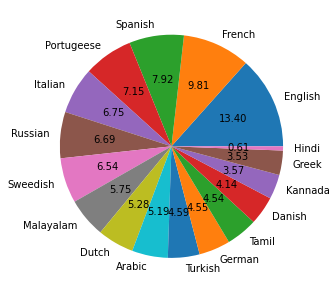

In [4]:
###### Show this target value counts in pie char and bar chart ######
plt.figure(figsize = (5, 9))
plt.pie(df.loc[:, 'Language'].value_counts(), labels = list(df.loc[:, 'Language'].value_counts().index), autopct = '%0.2f')
plt.show()

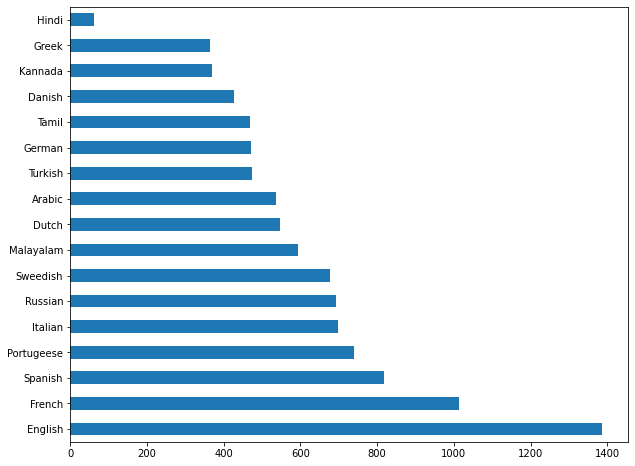

In [5]:
plt.figure(figsize = (10, 8))
df.loc[:, 'Language'].value_counts().plot(kind = 'barh')
plt.show()

In [6]:
df.describe()

,Text,Language
count,10337,10337
unique,10267,17
top,Jag är ledsen.,English
freq,3,1385


In [7]:
##### Lowering the dataset #####
df.loc[:, 'Text'] = df.loc[:, 'Text'].apply(lambda x: x.lower())

df.head()

,Text,Language
0,"nature, in the broadest sense, is the natural...",English
1,"""nature"" can refer to the phenomena of the phy...",English
2,"the study of nature is a large, if not the onl...",English
3,"although humans are part of nature, human acti...",English
4,[1] the word nature is borrowed from the old f...,English


In [8]:
###### Clean the dataset ######
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"\b\d+\b", "", text)
    text = re.sub(r"[\([{})\]]", "", text)
    text = re.sub("\n","",text)
    text = re.sub(r'[^\w]', ' ', text)

    return text
  
df.loc[:, 'Text'] = df.loc[:, 'Text'].apply(clean_text)

df.sample(10)

,Text,Language
2881,em a agence france presse citou daniel brand...,Portugeese
1607,വർഗ ഗ ശര ശര നഷ ട mean squared error ആക യ റ...,Malayalam
2693,artigos disponíveis em mais de uma língua pode...,Portugeese
255,astronomers have started to discover extrasol...,English
9429,أنا بخير ولكن شكرا على العرض,Arabic
4705,helaas moet ik nee zeggen,Dutch
5737,πρώτη φράση αυτός είναι ένας άλλος τρόπος να ρ...,Greek
7058,jeg er virkelig ked af det,Danish
10237,ನ ನ ನ ಮ ಮ ಸ ಲ ಫ ನ ಬಳಸ ದರ ನ ಮಗ ಮನಸ ಸ ಲ ಲವ,Kannada
3150,estou livre o fim de semana todo vamos fazer ...,Portugeese


In [9]:
###### Check duplicate records in the dataset ######
df.duplicated().sum()

74

In [10]:
###### Remove all duplicated records ######
df.drop_duplicates(inplace = True)

print("Duplicate records deleted.")

df.head()

Duplicate records deleted.


,Text,Language
0,nature in the broadest sense is the natural...,English
1,nature can refer to the phenomena of the phy...,English
2,the study of nature is a large if not the onl...,English
3,although humans are part of nature human acti...,English
4,the word nature is borrowed from the old fren...,English


In [11]:
##### Label Encoding in the target ######
from sklearn.preprocessing import LabelEncoder

label_encoder_ = LabelEncoder()
df.loc[:, 'Language'] = label_encoder_.fit_transform(df.loc[:, 'Language'])

df.head()

,Text,Language
0,nature in the broadest sense is the natural...,3
1,nature can refer to the phenomena of the phy...,3
2,the study of nature is a large if not the onl...,3
3,although humans are part of nature human acti...,3
4,the word nature is borrowed from the old fren...,3


Bag of Word Used to Convert Words into Vectors 

In [12]:
BOW_ = CountVectorizer()
X = BOW_.fit_transform(df.loc[:, 'Text']).toarray()

print("The shape of X is = ", X.shape,'\n')

The shape of X is =  (10263, 39466) 



In [13]:
###### Train and test split the dataset ######
X_train, X_test, y_train, y_test = train_test_split(X, df.loc[:, 'Language'], test_size = 0.25, random_state = 42, stratify = df.loc[:, 'Language'])

print("X_train shape is = ", X_train.shape)
print("y_train shape is = ", y_train.shape)
print("X_test  shape is = ", X_test.shape)
print("y_test  shape is = ", y_test.shape)

X_train shape is =  (7697, 39466)
y_train shape is =  (7697,)
X_test  shape is =  (2566, 39466)
y_test  shape is =  (2566,)


In [14]:
###### GaussianNB, BernoulliNB, MultinomialNB ######

GaussianNB_ = GaussianNB()
GaussianNB_.fit(X_train, y_train)
predicted_ = GaussianNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.9777864380358535
recall score is   =  0.9789259353576758
f1 score of its   =  0.9781677512327893
precision score is=  0.979514685682959


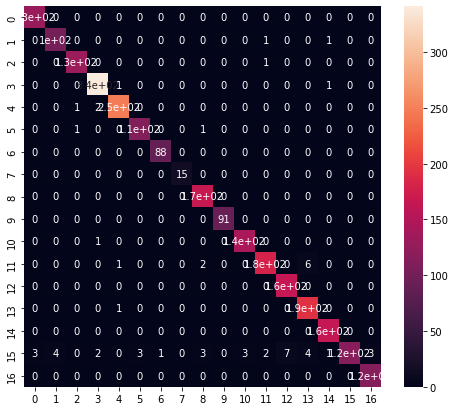

In [15]:
plt.figure(figsize = (8, 7))
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)
plt.show()

In [16]:
###### GaussianNB, BernoulliNB, MultinomialNB

BernoulliNB_ = BernoulliNB()
BernoulliNB_.fit(X_train, y_train)
predicted_ = BernoulliNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.4937646141855027
recall score is   =  0.8459312717480798
f1 score of its   =  0.4240651871870429
precision score is=  0.36279450599168905


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


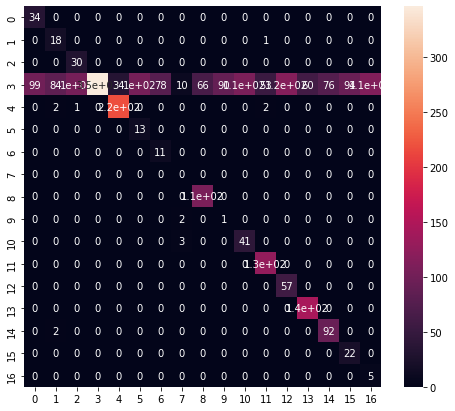

In [17]:
plt.figure(figsize = (8, 7))
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)
plt.show()

In [18]:
df.loc[:, 'Text'].values

array([' nature  in the broadest sense  is the natural  physical  material world or universe ',
       ' nature  can refer to the phenomena of the physical world  and also to life in general ',
       'the study of nature is a large  if not the only  part of science ',
       ...,
       'ಹ ಗ    ನ ರ ಸ ಸ ಸಮ  ಈಗ ಮರ ಯನ  ಅವರ ಗ  ಸ ಭವ ಸ ದ ಎಲ ಲವನ ನ  ಹ ಳ ದ  ಮತ ತ  ಅವಳ  ಆ ಸಮಯದ  ದ ತ  ಬ  ಬದಲ ಗ ದ ದ ಳ  ',
       'ಅವಳ  ಈಗ ಹ ಚ ಚ  ಚ ನ ನದ ಬ ರ ಡ  ಬಯಸ ವ ದ ಲ ಲ ಎ ದ  ನ ನ  ess ಹ ಸ ದ ದ ನ  ',
       'ಟ ರ ರ  ನ ವ  ನ ಜವ ಗ ಯ  ಆ ದ ವದ ತನ ತ  ಸ ವಲ ಪ ಕ ಣ ತ ತ ದ ದ ರ  ಆದರ  ನ ನ  ಏನ  ನ ಡ ತ ತ ದ ದ ನ  ನ ವ  ಹ ಗ  ಅವನ ಗಬಹ ದ  ನ ವ  ಇಬ ಬರ  ತ  ಬ  ಒಳ ಳ ಯವರ '],
      dtype=object)

In [19]:
###### GaussianNB, BernoulliNB, MultinomialNB

MultinomialNB_ = MultinomialNB()
MultinomialNB_.fit(X_train, y_train)
predicted_ = MultinomialNB_.predict(X_test)


print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.9785658612626656
recall score is   =  0.9893096592289853
f1 score of its   =  0.9828729522008957
precision score is=  0.9771996501232321


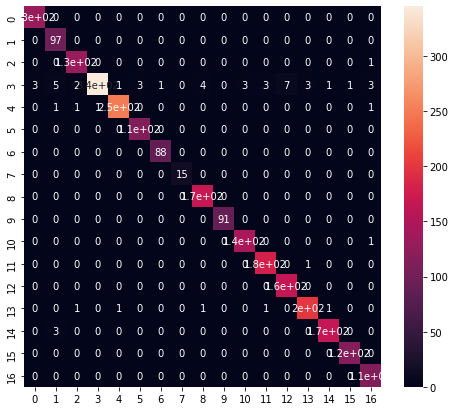

In [20]:
plt.figure(figsize = (8, 7))
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)
plt.show()

In [21]:
##### SGD Classifier ######

SGDClassifier_ = SGDClassifier()
SGDClassifier_.fit(X_train, y_train)
predicted_ = SGDClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.9583008573655495
recall score is   =  0.975793798860259
f1 score of its   =  0.9647258033061195
precision score is=  0.9565446148199941


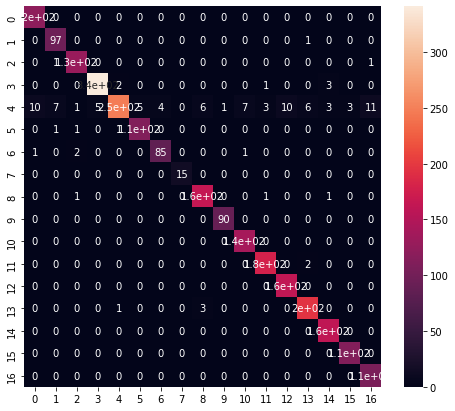

In [22]:
plt.figure(figsize = (8, 7))
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)
plt.show()

TF -IDF Used to Convert Words into Vectors

In [23]:
TF_IDF_ = TfidfVectorizer(max_features = 2000, binary = True)

X = TF_IDF_.fit_transform(df.loc[:, 'Text']).toarray()

print("The shape of X is = ", X.shape,'\n')

The shape of X is =  (10263, 2000) 



In [24]:
###### Train and test split the dataset ######
X_train, X_test, y_train, y_test = train_test_split(X, df.loc[:, 'Language'], test_size = 0.25, random_state = 42, stratify = df.loc[:, 'Language'])

print("X_train shape is = ", X_train.shape)
print("y_train shape is = ", y_train.shape)
print("X_test  shape is = ", X_test.shape)
print("y_test  shape is = ", y_test.shape)

X_train shape is =  (7697, 2000)
y_train shape is =  (7697,)
X_test  shape is =  (2566, 2000)
y_test  shape is =  (2566,)


In [25]:
###### GaussianNB, BernoulliNB, MultinomialNB ######

GaussianNB_ = GaussianNB()
GaussianNB_.fit(X_train, y_train)
predicted_ = GaussianNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.9388152766952456
recall score is   =  0.9416955758687161
f1 score of its   =  0.9330124188009735
precision score is=  0.9386978445980211


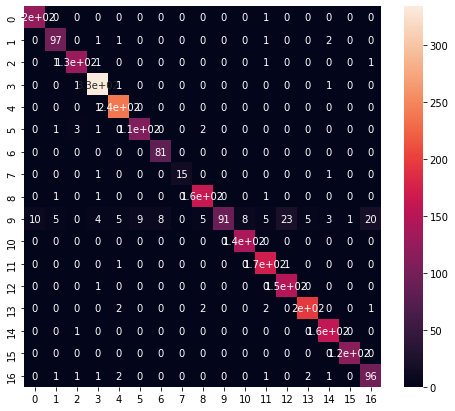

In [26]:
plt.figure(figsize = (8, 7))
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)
plt.show()

In [27]:
###### GaussianNB, BernoulliNB, MultinomialNB

MultinomialNB_ = MultinomialNB()
MultinomialNB_.fit(X_train, y_train)
predicted_ = MultinomialNB_.predict(X_test)


print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.9431021044427124
recall score is   =  0.9773455926249593
f1 score of its   =  0.9526252065113179
precision score is=  0.9337389798868452


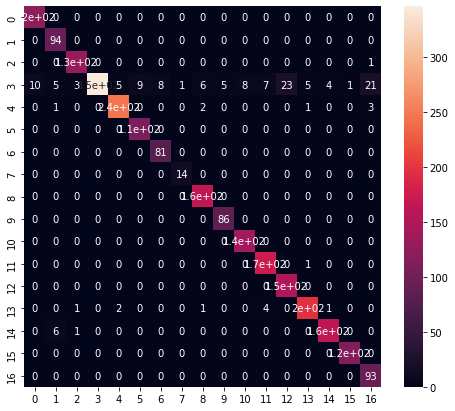

In [28]:
plt.figure(figsize = (8, 7))
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)
plt.show()

In [29]:
###### GaussianNB, BernoulliNB, MultinomialNB

BernoulliNB_ = BernoulliNB()
BernoulliNB_.fit(X_train, y_train)
predicted_ = BernoulliNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.9181605611847233
recall score is   =  0.958682590838733
f1 score of its   =  0.9070788491820021
precision score is=  0.8823970902355179


In [30]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

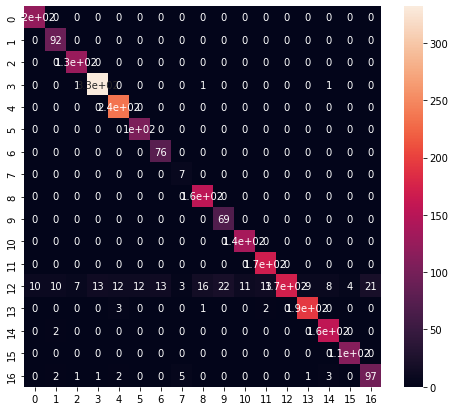

In [31]:
plt.figure(figsize = (8, 7))
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)
plt.show()

In [32]:
##### SGD Classifier ######

SGDClassifier_ = SGDClassifier()
SGDClassifier_.fit(X_train, y_train)
predicted_ = SGDClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.9442712392829307
recall score is   =  0.9629327641201592
f1 score of its   =  0.9474493962221269
precision score is=  0.9413126695825862


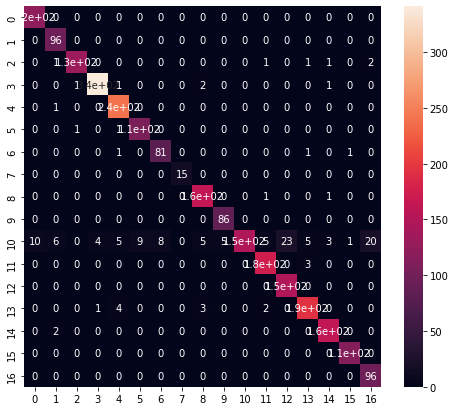

In [33]:
plt.figure(figsize = (8, 7))
sns.heatmap(confusion_matrix(predicted_, y_test), annot = True)
plt.show()

LSTM RNN used to predict the model

In [34]:
##### Find the unique word #####
tokenizer_ = Tokenizer()
tokenizer_.fit_on_texts(df.loc[:, 'Text'])

voc_size_ = len(tokenizer_.word_index)
voc_size_ = voc_size_ + 1

print("Unique vocabulary in this dataset is = ", voc_size_, '\n')

Unique vocabulary in this dataset is =  39681 



In [35]:
##### One hot representation #####
one_hot_ = [one_hot(record_, voc_size_) for record_ in df.loc[:, 'Text']]

print(one_hot_)

[[22620, 12387, 10016, 30203, 7853, 27075, 10016, 16750, 18776, 11897, 32337, 25796, 32966], [22620, 7410, 30910, 27126, 10016, 21183, 741, 10016, 18776, 32337, 9800, 37574, 27126, 33579, 12387, 19896], [10016, 2346, 741, 22620, 27075, 15787, 15091, 36798, 29242, 10016, 12425, 4625, 741, 20065], [34058, 23729, 18339, 4625, 741, 22620, 31710, 38205, 27075, 37013, 5534, 22170, 15787, 35743, 22191, 11922, 38136, 16750, 21183], [10016, 2936, 22620, 27075, 25465, 11922, 10016, 12783, 34412, 22620, 9800, 27075, 21161, 11922, 10016, 10172, 2936, 34765, 25796, 37235, 28521, 24385, 12072, 9800, 12387, 18761, 35456, 8834, 6029, 14774], [12387, 18761, 26217, 34765, 27075, 34713, 27289, 22170, 10016, 10172, 26730, 741, 10016, 6536, 2936, 25916, 7386, 38501, 10552, 30819, 27126, 10016, 15710, 2505, 23017, 13640, 1763, 9800, 38136, 30347, 741, 10016, 32337, 21647, 741, 1806, 18870, 37690], [10016, 9153, 741, 22620, 22170, 15787, 20864, 10016, 18776, 32966, 27075, 17175, 741, 16596, 289, 741, 10016, 

In [36]:
##### Find the maxlen of the list #####
maxlen_ = -1

for list_ in df.loc[:, 'Text']:
  if len(list_) > maxlen_:
    maxlen_ = len(list_)
  else:
    pass

print("Max Length is = ", maxlen_)

Max Length is =  18290


In [37]:
##### Embedded doc create using pad sequences #####

embedded_doc_ = pad_sequences(one_hot_, padding = 'pre', maxlen = maxlen_ + 2)

print(embedded_doc_)

[[    0     0     0 ... 32337 25796 32966]
 [    0     0     0 ... 33579 12387 19896]
 [    0     0     0 ...  4625   741 20065]
 ...
 [    0     0     0 ... 15816 15816   544]
 [    0     0     0 ... 15816 15816 11243]
 [    0     0     0 ...  2345   544 22809]]


In [38]:
###### Train and test split the dataset ######
X_train, X_test, y_train, y_test = train_test_split(embedded_doc_, df.loc[:, 'Language'], test_size = 0.25, random_state = 42, stratify = df.loc[:, 'Language'])

print("X_train shape is = ", X_train.shape)
print("y_train shape is = ", y_train.shape)
print("X_test  shape is = ", X_test.shape)
print("y_test  shape is = ", y_test.shape)

X_train shape is =  (7697, 18292)
y_train shape is =  (7697,)
X_test  shape is =  (2566, 18292)
y_test  shape is =  (2566,)


In [39]:
###### Embedding Layer and LSTM ######
model = Sequential()

###### Create an embeddig layer ######
model.add(Embedding(input_dim = voc_size_, output_dim = 100, input_length = maxlen_ + 2))
###### Use the Dropout Layer ######
model.add(Dropout(0.5))


###### Create an LSTM with 100 neurons #####
model.add(LSTM(units = 100))
###### Use the dropout function ######
model.add(Dropout(0.5))


###### Create an output layer ######
model.add(Dense(units = 17, activation = 'softmax'))


###### Compile the model ######
model.compile(optimizer = 'Adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

###### fit the model and run ######
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 5, batch_size = 64, verbose = 1)

Epoch 1/5
121/121 [==============================] - 117s 944ms/step - loss: 2.4606 - accuracy: 0.2815 - val_loss: 1.8218 - val_accuracy: 0.4575
Epoch 2/5
121/121 [==============================] - 117s 968ms/step - loss: 1.4443 - accuracy: 0.5906 - val_loss: 1.0671 - val_accuracy: 0.8044
Epoch 3/5
121/121 [==============================] - 116s 963ms/step - loss: 0.7673 - accuracy: 0.8298 - val_loss: 0.5133 - val_accuracy: 0.9088
Epoch 4/5
121/121 [==============================] - 120s 995ms/step - loss: 0.3792 - accuracy: 0.9327 - val_loss: 0.2999 - val_accuracy: 0.9451
Epoch 5/5
121/121 [==============================] - 122s 1s/step - loss: 0.2062 - accuracy: 0.9606 - val_loss: 0.2043 - val_accuracy: 0.9560


In [40]:
64*9

576

In [41]:
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis = 1)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(y_pred_bool, y_test))
print("recall is     = ", recall_score(y_pred_bool, y_test, average = 'macro'))
print("precision is  = ", precision_score(y_pred_bool, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(y_pred_bool, y_test, average = 'macro'))

accuracy is   =  0.955962587685113
recall is     =  0.9619521690938058
precision is  =  0.9531753886226673
f1 score is   =  0.9550685016854785


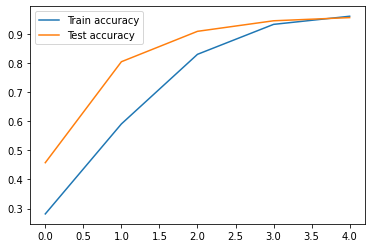

In [42]:
###### plot the accuracy and val_accuracy ######
plt.plot(history_.history['accuracy'], label = 'Train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'Test accuracy')
plt.legend()
plt.show()

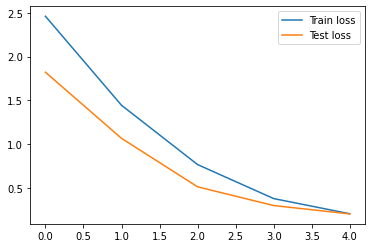

In [43]:
###### plot the loss and val_loss ######
plt.plot(history_.history['loss'], label = 'Train loss')
plt.plot(history_.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()

In [47]:
def sentence_cleaning(sentence):
    """Pre-processing sentence for prediction"""
    stemmer = PorterStemmer()
    text = sentence
    corpus = []
    text = re.sub(r"\b\d+\b", "", text)
    text = re.sub(r"[\([{})\]]", "", text)
    text = re.sub("\n","",text)
    text = re.sub(r'[^\w]', ' ', text)
    text = text.lower()
    text = word_tokenize(text)
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=voc_size_) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen=maxlen_ + 2, padding='pre')
    return pad

In [57]:
sentences = ["i hate to read book", 
             "मुझे तुमसे प्यार है", 
             "Ich möchte meine Hochschule wechseln", 
             "Je veux changer d'université", 
             "أخوك شديد العناد", 
             "Tu hermano es demasiado obstinado",
             "Tuo fratello è troppo ostinato", 
             "nlp கற்கலாம்"
             ]
for sentence in sentences:
    print(sentence)
    sentence = sentence_cleaning(sentence)
    result = label_encoder_.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

i hate to read book
English : 0.6423202157020569


मुझे तुमसे प्यार है
Hindi : 0.24782665073871613


Ich möchte meine Hochschule wechseln
German : 0.82300865650177


Je veux changer d'université
French : 0.7538120150566101


أخوك شديد العناد
Turkish : 0.17722593247890472


Tu hermano es demasiado obstinado
Spanish : 0.6622564792633057


Tuo fratello è troppo ostinato
Italian : 0.7036069631576538


nlp கற்கலாம்
Tamil : 0.20454980432987213


